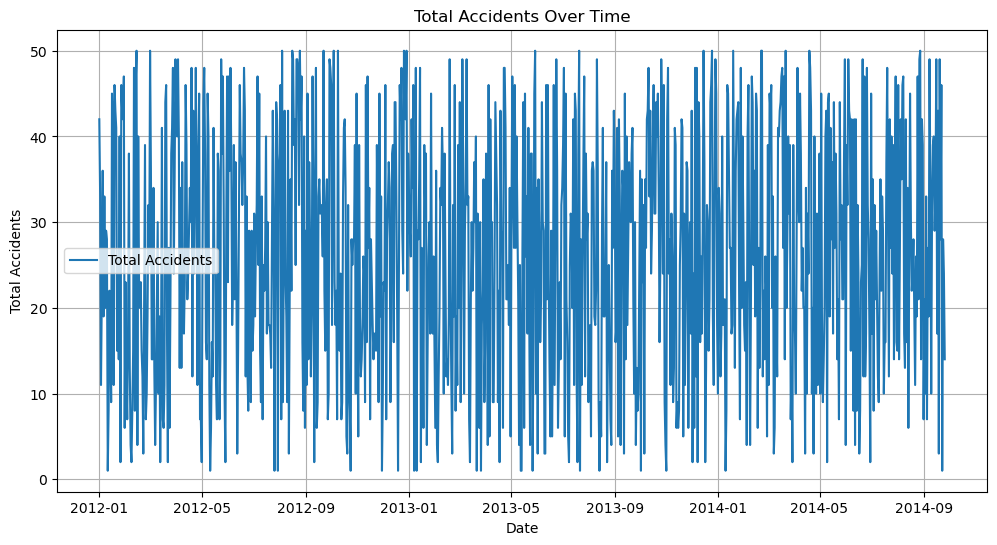

ADF Statistic: -30.539082389301647
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}


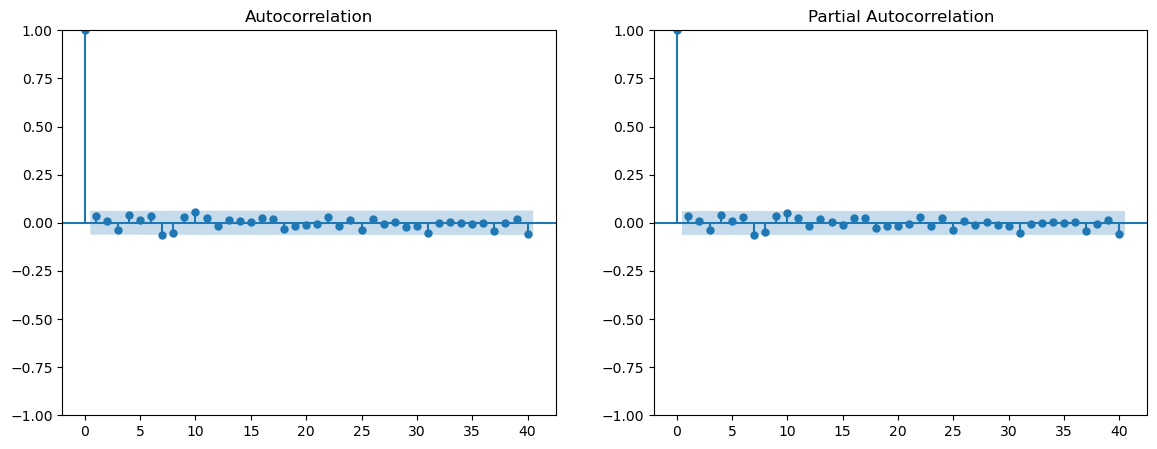

C:\Users\HARISH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HARISH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\HARISH\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        Total Accidents   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -4080.435
Date:                Sat, 19 Apr 2025   AIC                           8172.871
Time:                        13:40:53   BIC                           8202.317
Sample:                    01-01-2012   HQIC                          8184.063
                         - 09-26-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2640      0.469     56.007      0.000      25.345      27.183
ar.L1         -1.2976      0.343     -3.787      0.000      -1.969      -0.626
ar.L2         -0.5172      0.334     -1.548      0.1

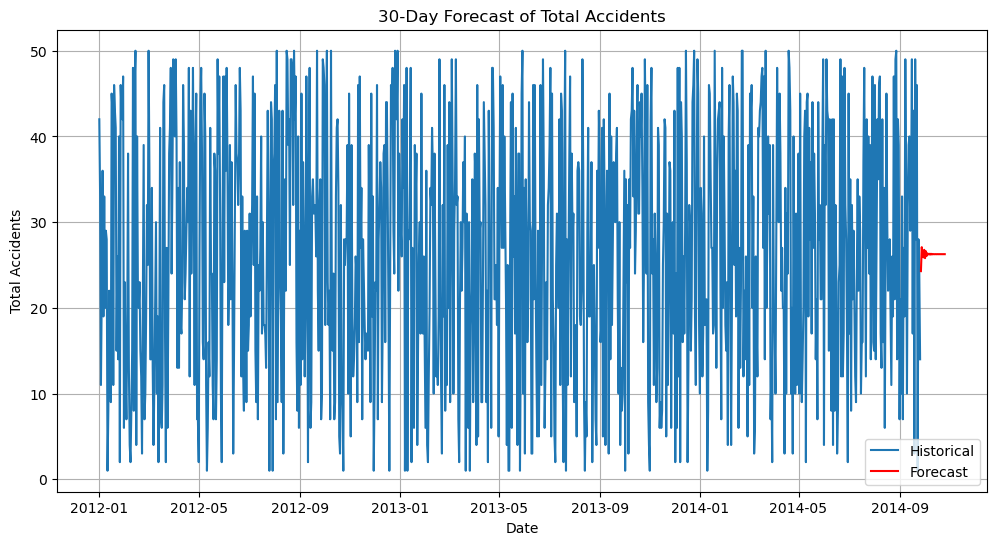

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# 1. Load the data
file_path = r"C:\Users\HARISH\Desktop\notes\time series and analysis pratical\ex 6\accident_time_series_1000_rows.csv"
df = pd.read_csv(file_path)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# 2. Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Total Accidents'], label='Total Accidents')
plt.title('Total Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Total Accidents')
plt.legend()
plt.grid(True)
plt.show()

# 3. ADF Test for stationarity
result = adfuller(df['Total Accidents'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])

# 4. ACF and PACF Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(df['Total Accidents'], ax=axes[0], lags=40)
plot_pacf(df['Total Accidents'], ax=axes[1], lags=40, method='ywm')
plt.show()

# 5. Fit ARIMA Model (Adjust order based on ACF/PACF)
model = ARIMA(df['Total Accidents'], order=(2, 0, 2))
model_fit = model.fit()
print(model_fit.summary())

# 6. Forecast future values
forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(12, 6))
plt.plot(df['Total Accidents'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('30-Day Forecast of Total Accidents')
plt.xlabel('Date')
plt.ylabel('Total Accidents')
plt.legend()
plt.grid(True)
plt.show()
